<a href="https://colab.research.google.com/github/abdulrehmanaban/Rahul-AbdulRehman.AISC2007/blob/main/Rahul%2BAbdulRehman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1



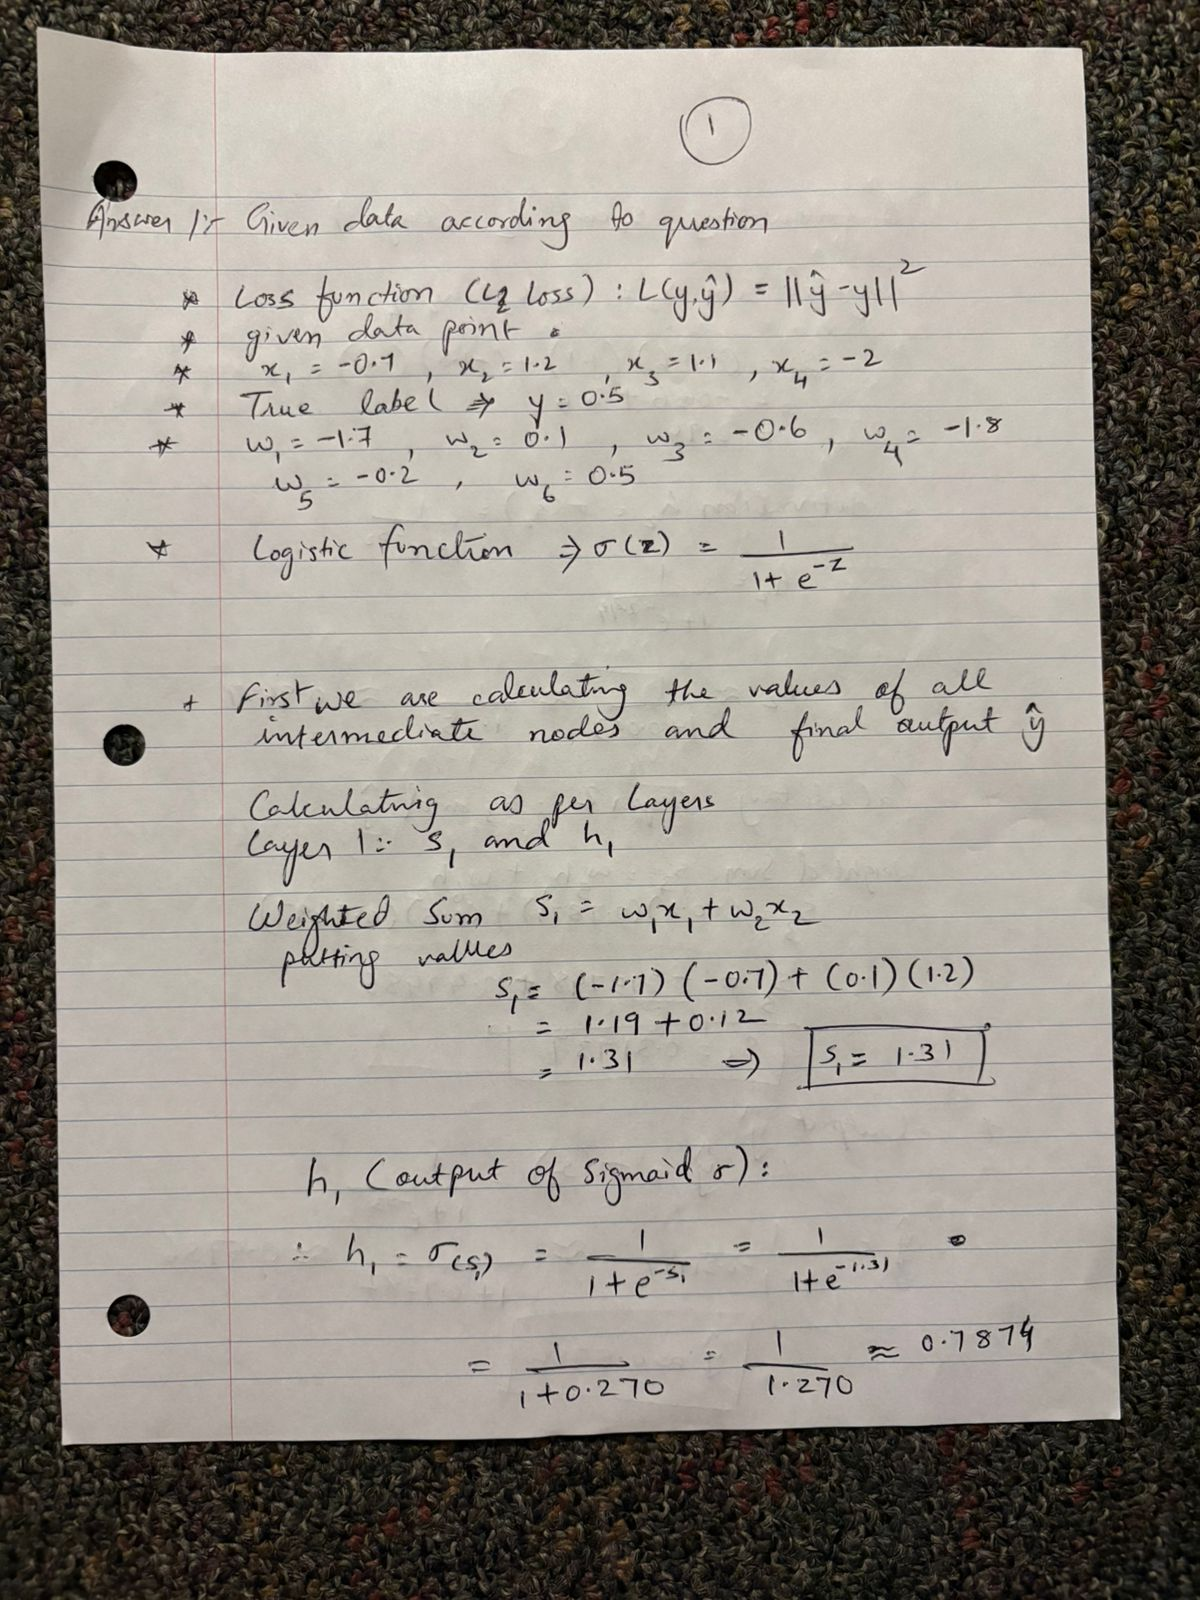

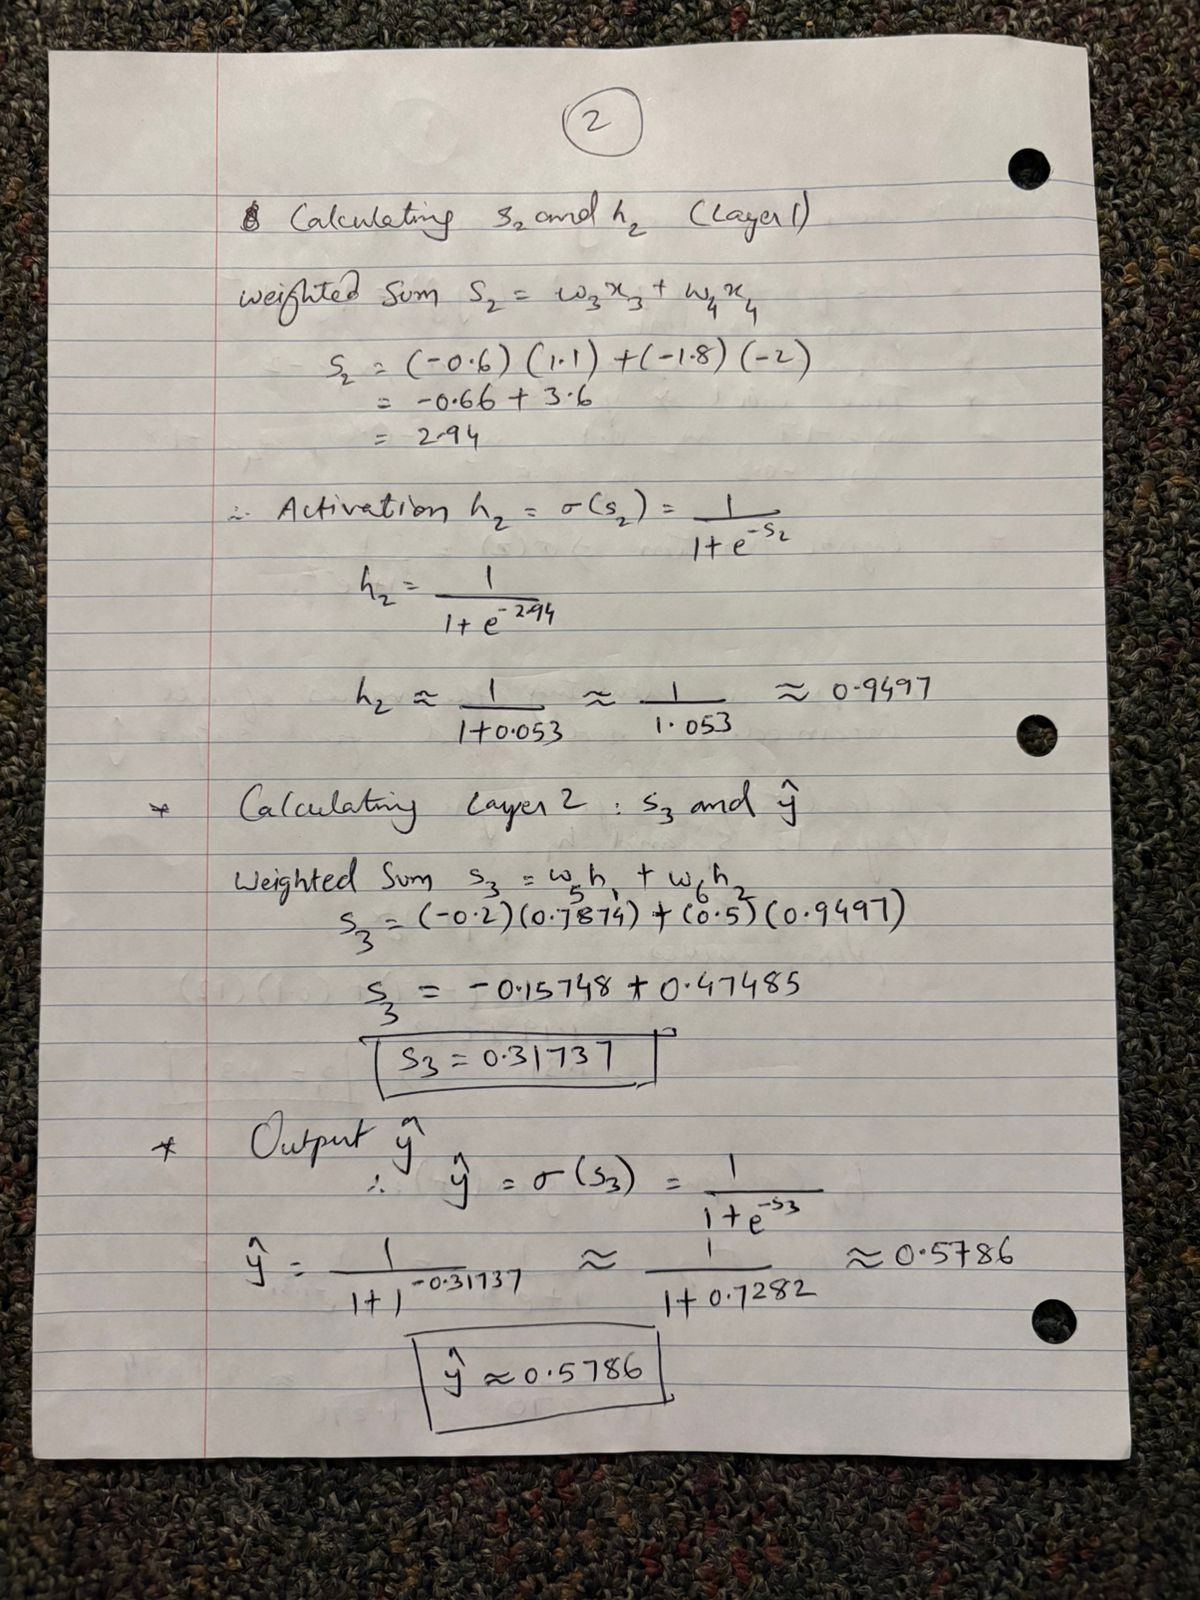

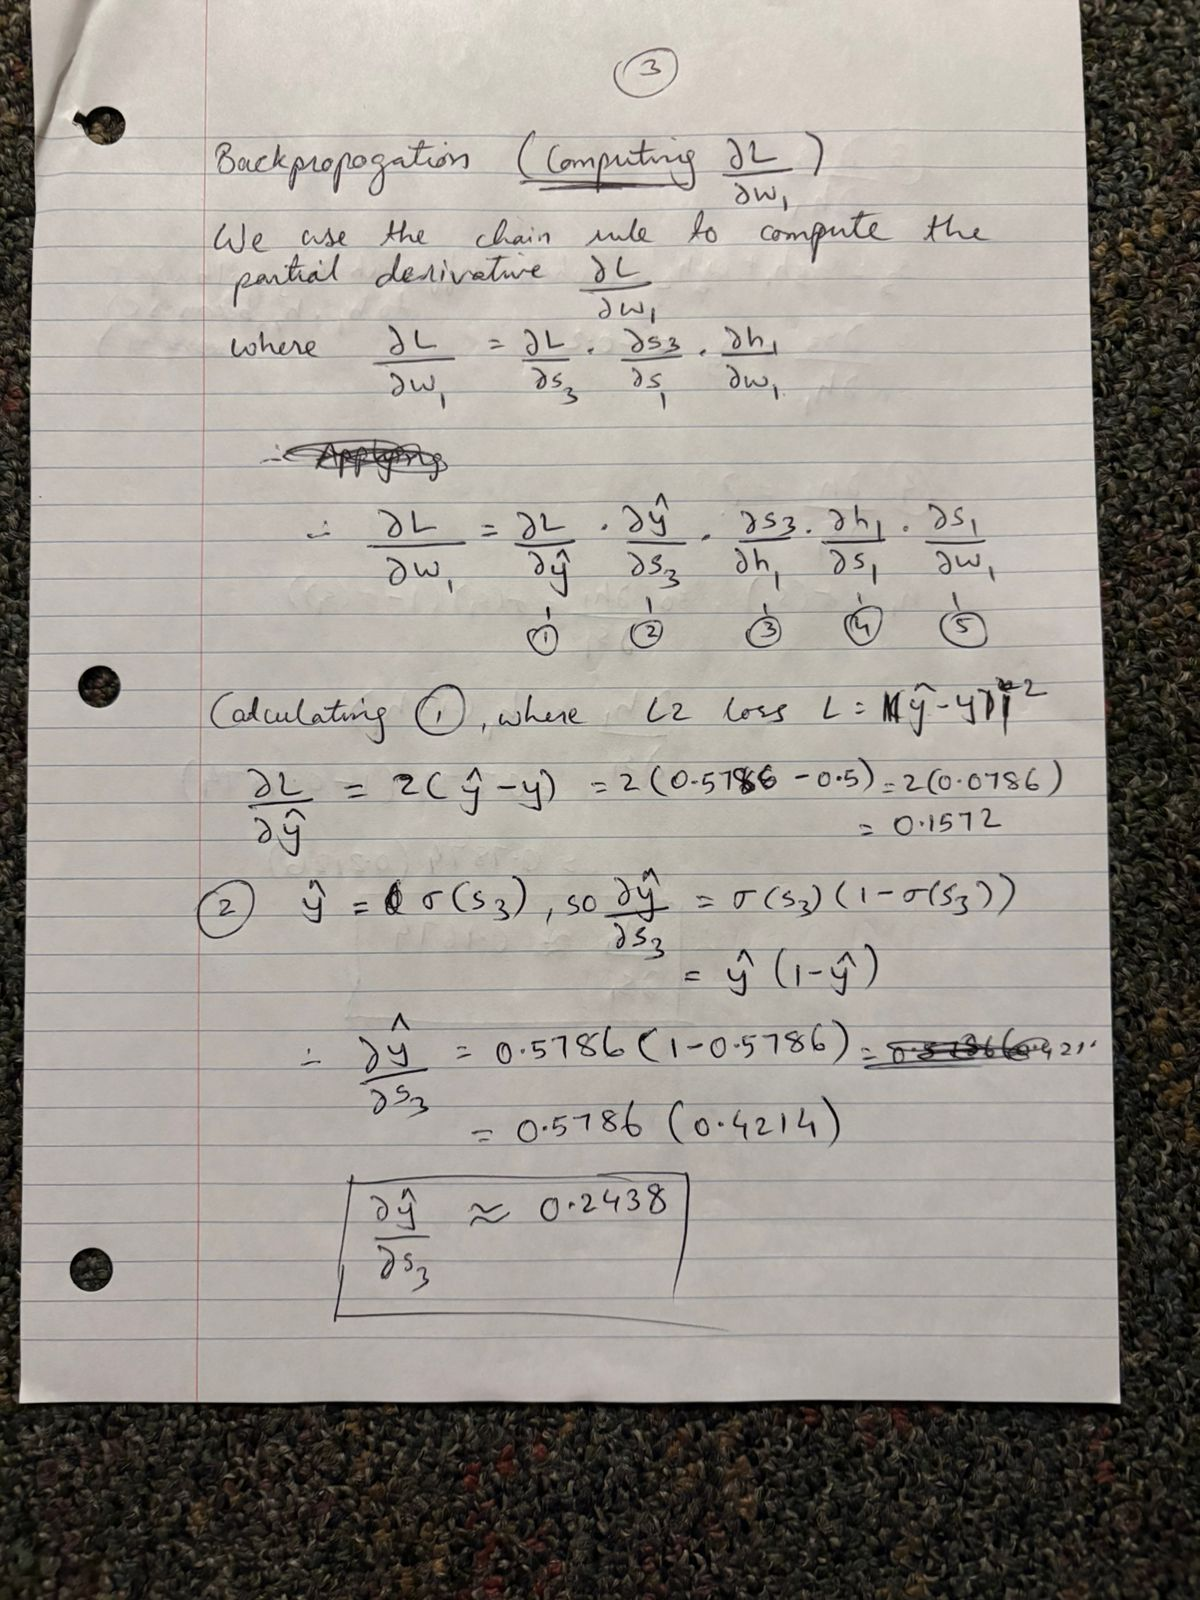

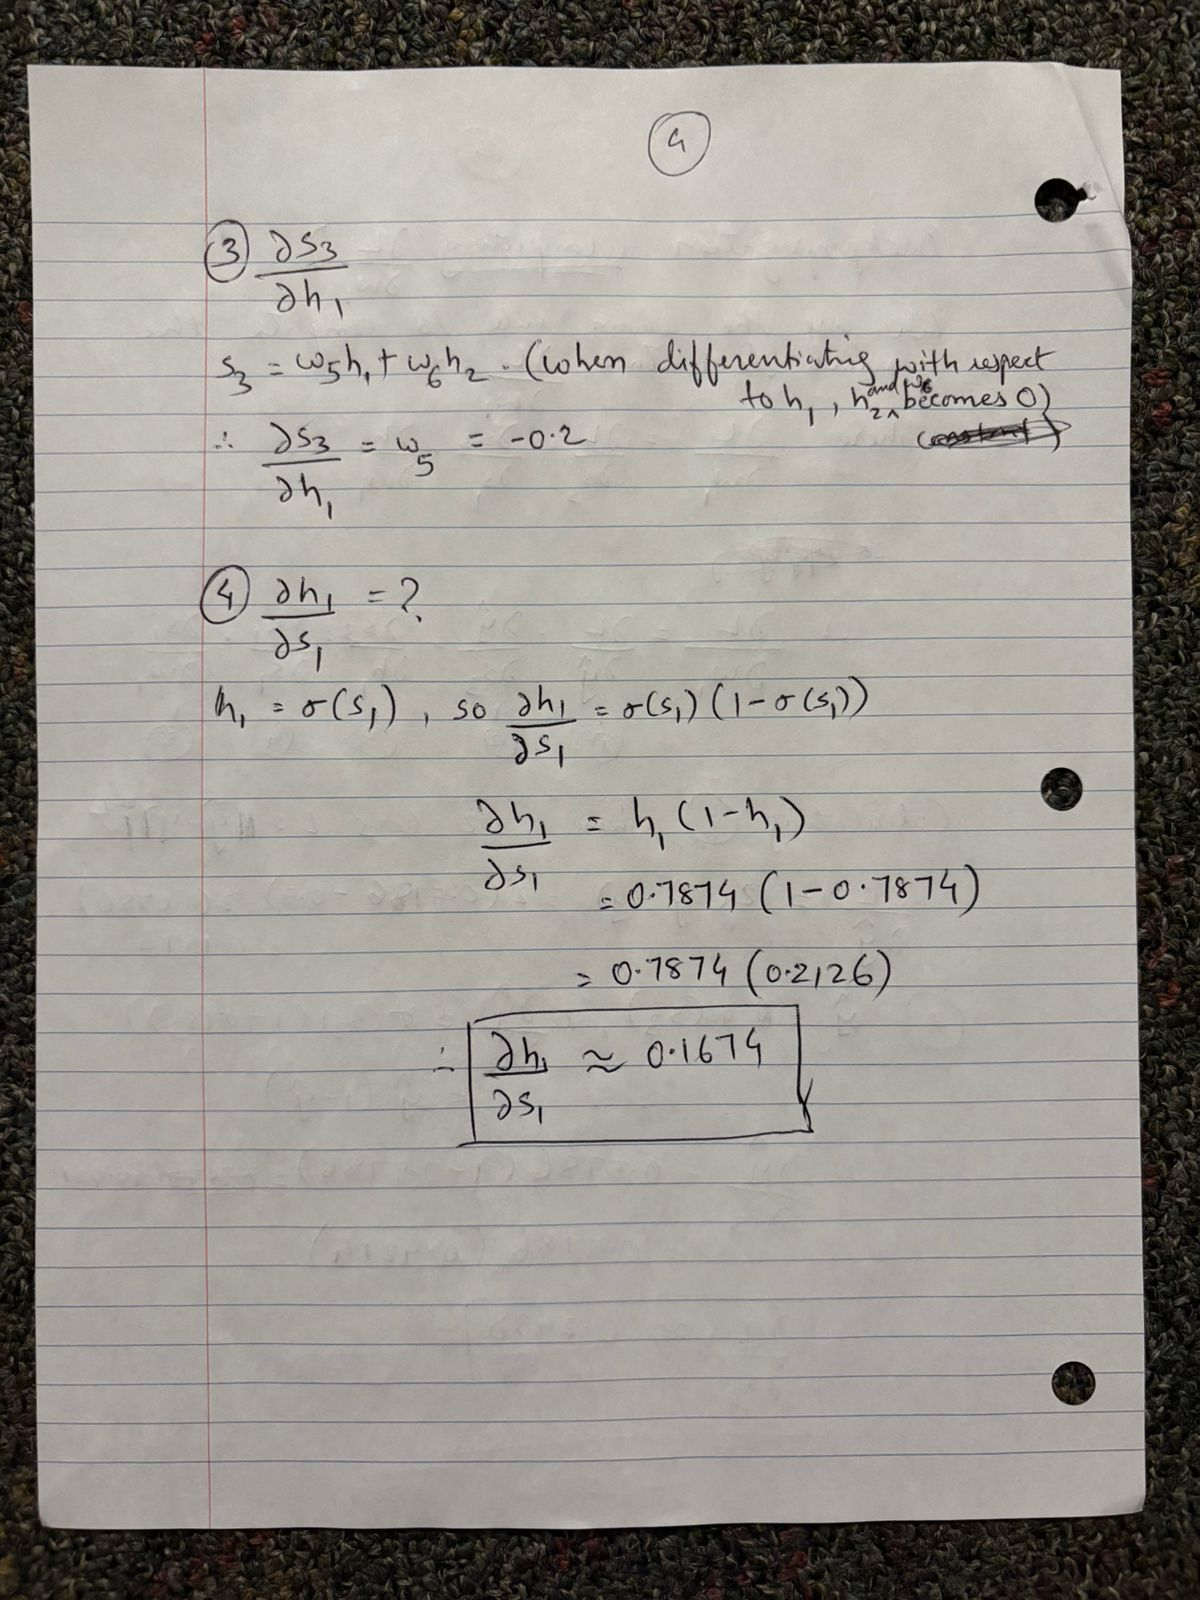

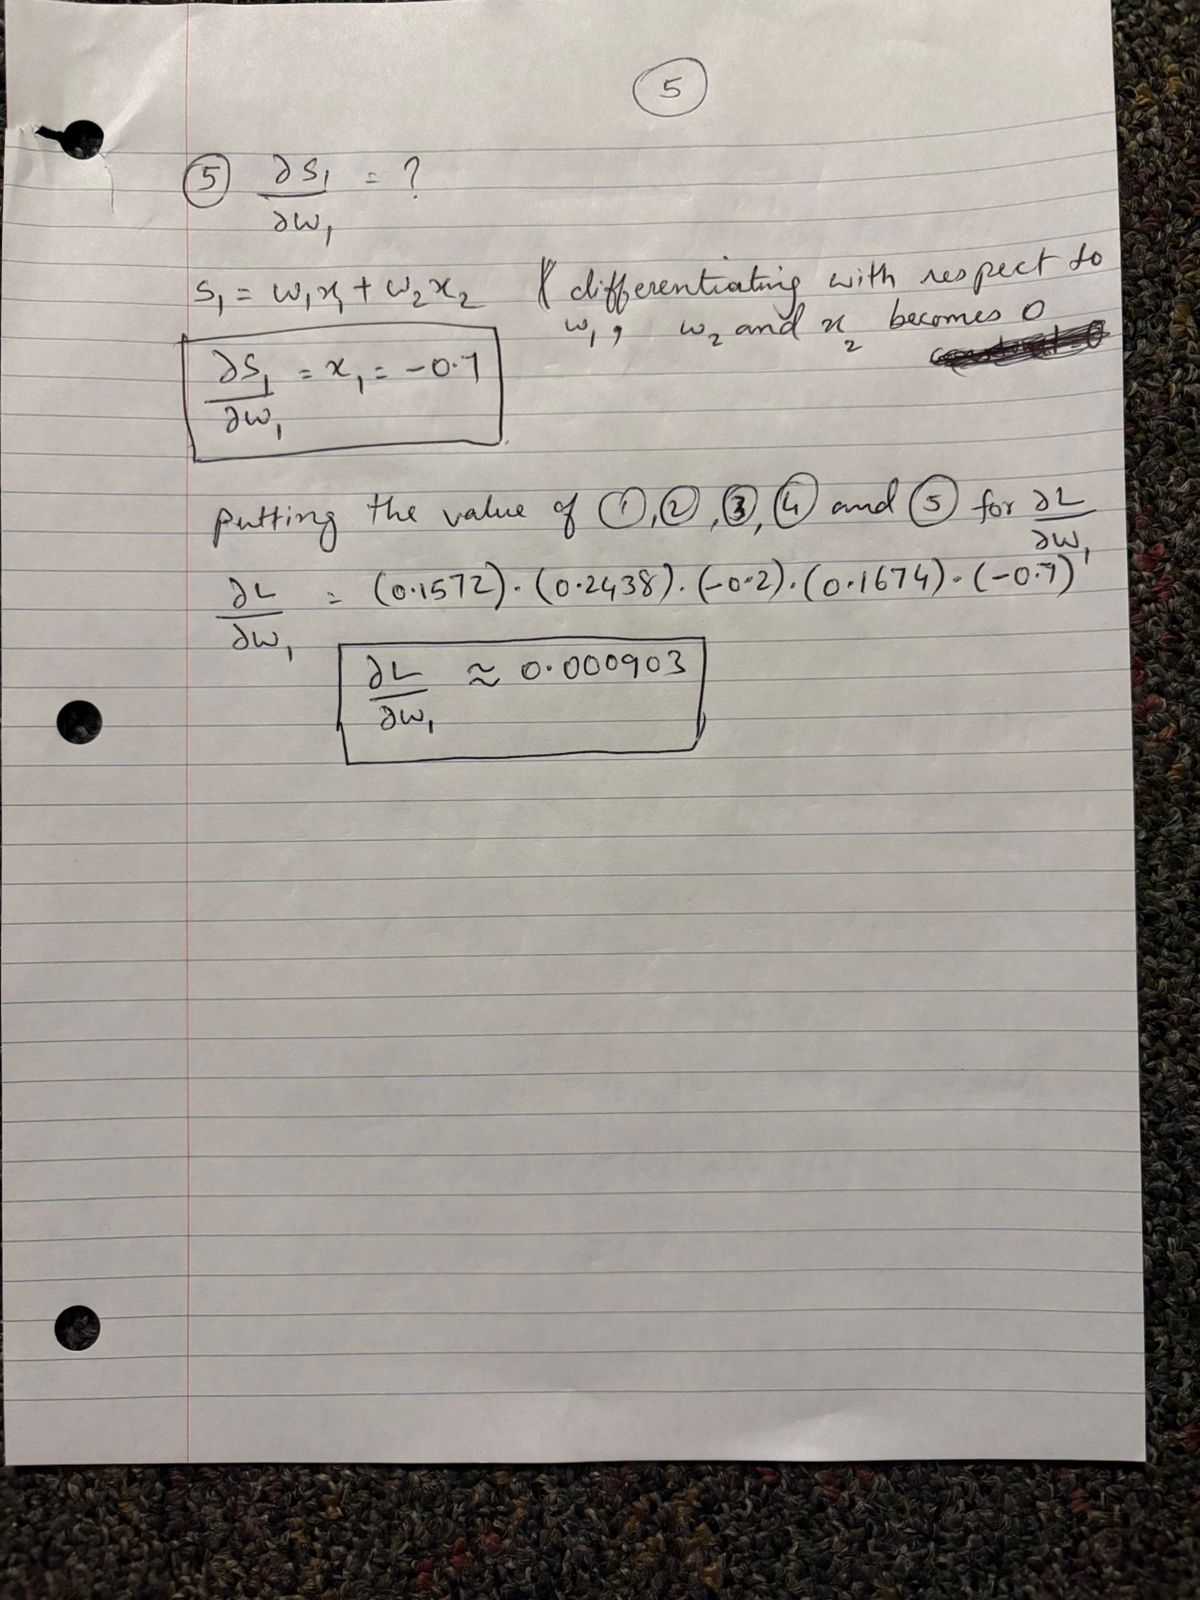

#Question 2

In [ ]:
import pandas as pd

train_path = "trainData.txt"
test_path  = "testData.txt"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)


#(a)

In [ ]:
print("No. of Train Samples:", train_df.shape[0])
print("No. of Test Samples:", test_df.shape[0])
print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

No. of Train Samples: 8143
No. of Test Samples: 9752
Train shape: (8143, 7)
Test shape : (9752, 7)


In [ ]:
train_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
test_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


#(b)

In [ ]:
from sklearn.preprocessing import StandardScaler

feature_cols = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]
target = "Occupancy"

X_train = train_df[feature_cols].values
y_train = train_df[target].values

X_test = test_df[feature_cols].values
y_test = test_df[target].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt

In [ ]:

hidden_list = [4, 8, 16, 32]
accs = []

for h in hidden_list:
  model = Sequential([
    layers.Input(shape=(5,)),
    layers.Dense(h, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

  fittedModel = model.fit(X_train_scaled, y_train, epochs=100, verbose=0)
  loss,acc = model.evaluate(X_test_scaled, y_test, verbose=0)
  accs.append(acc)



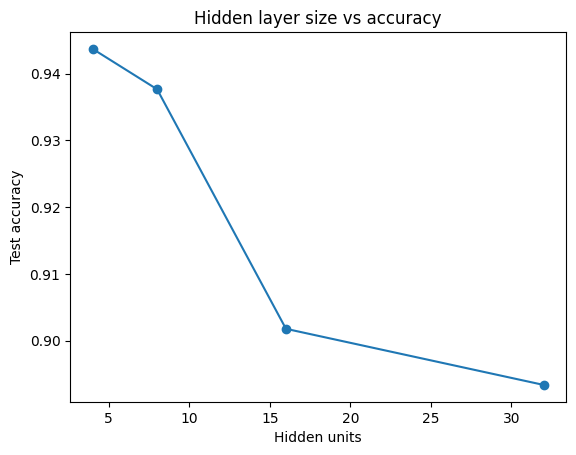

In [ ]:
plt.plot(hidden_list, accs, marker='o')
plt.xlabel("Hidden units")
plt.ylabel("Test accuracy")
plt.title("Hidden layer size vs accuracy")
plt.show()

#(c)

In [ ]:
architectures = [(8,4), (16,8), (32,16)]

for h1,h2 in architectures:
  model = Sequential([
    layers.Input(shape=(5,)),
    layers.Dense(h1, activation='relu'),
    layers.Dense(h2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

  fittedModel = model.fit(X_train_scaled, y_train, epochs=100, verbose=0)
  loss,acc = model.evaluate(X_test_scaled, y_test, verbose=0)
  print(f"Architecture 5-{h1}-{h2}-1 → Test accuracy = {acc:.4f}")

Architecture 5-8-4-1 → Test accuracy = 0.9336
Architecture 5-16-8-1 → Test accuracy = 0.8893
Architecture 5-32-16-1 → Test accuracy = 0.8957


#(d)

From part (b), as we increased the number of hidden units from 4 to 32, we noticed that the test accuracy didnot improved as we increased the unit. This suggest larger unit may not always generalize better as it didn't outperform the smaller model. In part (c), when we added a second hidden layer, we noticed similar behavior. The small-sized architecture 5-8-4-1 achieved the highest accuracy (0.9336), outperforming both the medium 5-16-8-1 model and the larger 5-32-16-1 model. From this we can see small-sized architecture is better for this dataset.

#Question 3

The authors have applied a Recurrent Neural Network (RNN), specifically the Long-Short Term Memory (LSTM) model, to forecast future stock values. The goal was to build a model which predicts future asset values with high accuracy by utilizing the ability of RNNs in earlier stages.
The model aimed to forecast the adjusted closing prices of a portfolio, utilizing the daily opening prices of GOOGL and NKE stocks from the NYSE.
The author used 80% of the data for training and 20% for testing using the mean squared error as loss function across different epoch (12,25,50 and 100) to optimize the model during training for prediction precision. They structured model with four LSTM layers, four dropout layers to reduce overfitting totalling 260,065 trainable parameters and one dense layer with one output unit. The final results showed the number of epochs as well as the length of the data have both significant impact on the result of testing. The data from table 2 confirms that the precision of the forecasting increases if more epochs are added for the training of the model.

#Reference
- https://www.tensorflow.org/tutorials/keras/classification
- https://www.geeksforgeeks.org/deep-learning/feedforward-neural-network/